In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random

import torch
import torch.nn as nn

# created library
import mydata
from mymodels import TransDataset, LoadDataset, EfficientB7Model, ResNet50Model, VGG16Model
from training import ModelTrainer

In [2]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [3]:
db = "HAM"
root = f"../../dataset/AAAI 2025/{db}/"
df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

ycol="labels"
batch_size = 8
ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (450, 600)


# Efficientnet

In [4]:
model_name = "efficientnet"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

Validation Accuracy: 0.6659 | Loss: 0.6376 | F1: 0.5338
Validation Accuracy: 0.7857 | Loss: 0.4818 | F1: 0.7657
Validation Accuracy: 0.8249 | Loss: 0.4185 | F1: 0.8100
Validation Accuracy: 0.8387 | Loss: 0.3729 | F1: 0.8301
Validation Accuracy: 0.8502 | Loss: 0.3574 | F1: 0.8506
Validation Accuracy: 0.8548 | Loss: 0.3437 | F1: 0.8565
Validation Accuracy: 0.8641 | Loss: 0.3356 | F1: 0.8644
Validation Accuracy: 0.8594 | Loss: 0.3469 | F1: 0.8516
Validation Accuracy: 0.8618 | Loss: 0.3444 | F1: 0.8551
Validation Accuracy: 0.8687 | Loss: 0.3399 | F1: 0.8627
Validation Accuracy: 0.8871 | Loss: 0.3124 | F1: 0.8884
Validation Accuracy: 0.8802 | Loss: 0.3066 | F1: 0.8839
Validation Accuracy: 0.8871 | Loss: 0.2972 | F1: 0.8884
Validation Accuracy: 0.8779 | Loss: 0.2986 | F1: 0.8804
Validation Accuracy: 0.8710 | Loss: 0.3242 | F1: 0.8614
Validation Accuracy: 0.8779 | Loss: 0.2826 | F1: 0.8770
Validation Accuracy: 0.8963 | Loss: 0.2803 | F1: 0.8951
Validation Accuracy: 0.8733 | Loss: 0.2982 | F1:

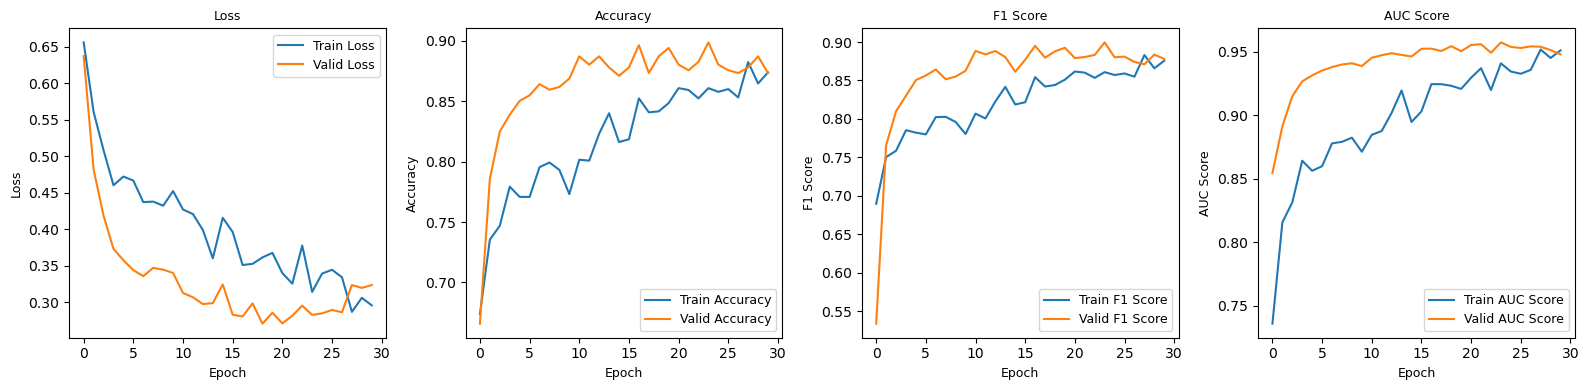

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientB7Model().to(device) # model -> GPU

# Train the model
num_epochs = 30
lr = 1e-5

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [6]:
model = EfficientB7Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions, test_outputs = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
trainer.report(tmp)
tmp.to_csv(df_valid_filepath, index=False)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       217
           1       0.88      0.89      0.89       217

    accuracy                           0.89       434
   macro avg       0.89      0.89      0.89       434
weighted avg       0.89      0.89      0.89       434

Skin tone 1: Accuracy 0.8870967741935484


In [7]:
test_predictions, test_outputs = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
trainer.report(tmp)
tmp.to_csv(df_test_filepath, index=False)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       217
           1       0.91      0.83      0.87       217

    accuracy                           0.88       434
   macro avg       0.88      0.88      0.88       434
weighted avg       0.88      0.88      0.88       434

Skin tone 1: Accuracy 0.8755760368663594


# Resnet

In [8]:
model_name = "resnet"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation Accuracy: 0.7442 | Loss: 0.6735 | F1: 0.7767
Validation Accuracy: 0.7650 | Loss: 0.6669 | F1: 0.7952
Validation Accuracy: 0.7696 | Loss: 0.6621 | F1: 0.8008
Validation Accuracy: 0.7327 | Loss: 0.6595 | F1: 0.7820
Validation Accuracy: 0.7650 | Loss: 0.6486 | F1: 0.8038
Validation Accuracy: 0.7880 | Loss: 0.6383 | F1: 0.8175
Validation Accuracy: 0.7995 | Loss: 0.6241 | F1: 0.8228
Validation Accuracy: 0.7650 | Loss: 0.6270 | F1: 0.8046
Validation Accuracy: 0.7834 | Loss: 0.6123 | F1: 0.8127
Validation Accuracy: 0.7995 | Loss: 0.5829 | F1: 0.8228
Validation Accuracy: 0.7926 | Loss: 0.5740 | F1: 0.8193
Validation Accuracy: 0.7972 | Loss: 0.5573 | F1: 0.8240
Validation Accuracy: 0.7995 | Loss: 0.5376 | F1: 0.8284
Validation Accuracy: 0.8018 | Loss: 0.5176 | F1: 0.8300
Validation Accuracy: 0.7995 | Loss: 0.4978 | F1: 0.8277
Validation Accuracy: 0.7949 | Loss: 0.4952 | F1: 0.8251
Validation Accuracy: 0.7972 | Loss: 0.4833 | F1: 0.8268
Validation Accuracy: 0.8018 | Loss: 0.4638 | F1:

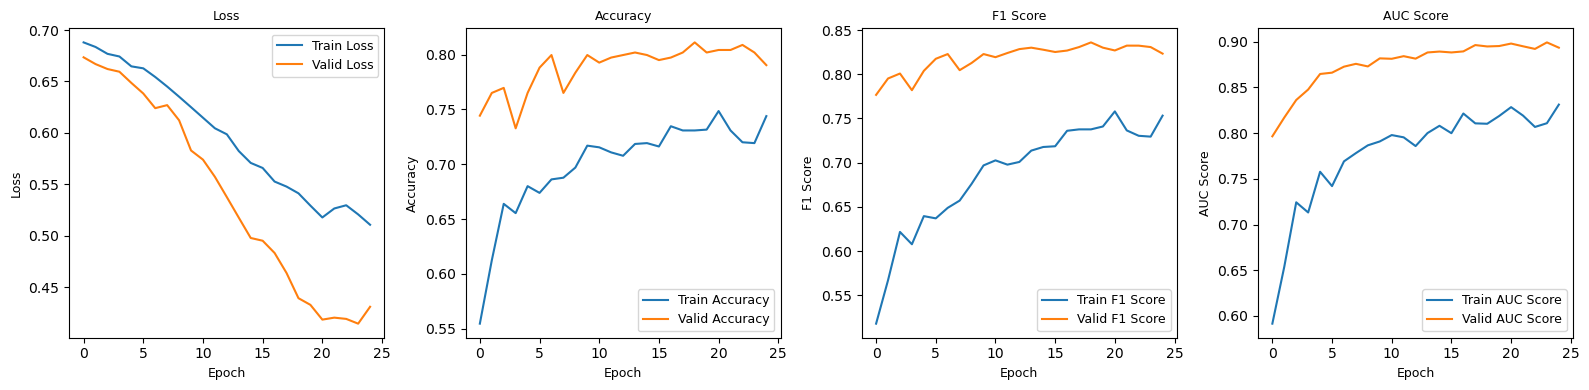

In [9]:
model = ResNet50Model().to(device) # model -> GPU

# Train the model
num_epochs = 25
lr = 1e-6

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [10]:
model = ResNet50Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions, test_outputs = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
trainer.report(tmp)
tmp.to_csv(df_valid_filepath, index=False)

              precision    recall  f1-score   support

           0       0.96      0.63      0.76       217
           1       0.73      0.97      0.83       217

    accuracy                           0.80       434
   macro avg       0.84      0.80      0.80       434
weighted avg       0.84      0.80      0.80       434

Skin tone 1: Accuracy 0.8018433179723502


In [11]:
test_predictions, test_outputs = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
trainer.report(tmp)
tmp.to_csv(df_test_filepath, index=False)

              precision    recall  f1-score   support

           0       0.90      0.64      0.74       217
           1       0.72      0.93      0.81       217

    accuracy                           0.78       434
   macro avg       0.81      0.78      0.78       434
weighted avg       0.81      0.78      0.78       434

Skin tone 1: Accuracy 0.7811059907834101


# VGG

In [12]:
model_name = "vgg"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

Validation Accuracy: 0.7028 | Loss: 0.6569 | F1: 0.7505
Validation Accuracy: 0.6406 | Loss: 0.6210 | F1: 0.7292
Validation Accuracy: 0.7166 | Loss: 0.5673 | F1: 0.7709
Validation Accuracy: 0.7604 | Loss: 0.5062 | F1: 0.7945
Validation Accuracy: 0.7627 | Loss: 0.4791 | F1: 0.7944
Validation Accuracy: 0.7719 | Loss: 0.4563 | F1: 0.8024
Validation Accuracy: 0.7834 | Loss: 0.4441 | F1: 0.8127
Validation Accuracy: 0.7857 | Loss: 0.4449 | F1: 0.8166
Validation Accuracy: 0.7857 | Loss: 0.4376 | F1: 0.8173
Validation Accuracy: 0.7788 | Loss: 0.4496 | F1: 0.8140
Validation Accuracy: 0.8134 | Loss: 0.4096 | F1: 0.8350
Validation Accuracy: 0.8065 | Loss: 0.4184 | F1: 0.8300
Validation Accuracy: 0.8041 | Loss: 0.4281 | F1: 0.8290
Validation Accuracy: 0.8226 | Loss: 0.3959 | F1: 0.8412
Validation Accuracy: 0.7972 | Loss: 0.4335 | F1: 0.8254
Validation Accuracy: 0.7972 | Loss: 0.4334 | F1: 0.8240
Validation Accuracy: 0.8157 | Loss: 0.4126 | F1: 0.8361
Validation Accuracy: 0.8203 | Loss: 0.3944 | F1:

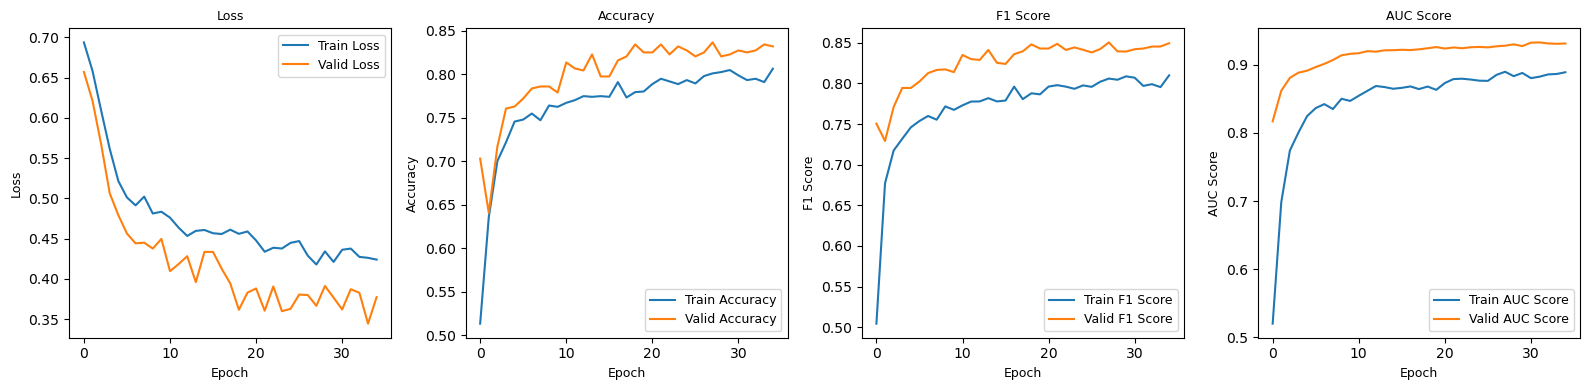

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16Model().to(device)

# Train the model
num_epochs = 35
lr = 1e-6

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [14]:
model = VGG16Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions, test_outputs = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
trainer.report(tmp)
tmp.to_csv(df_valid_filepath, index=False)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       217
           1       0.79      0.91      0.85       217

    accuracy                           0.83       434
   macro avg       0.84      0.83      0.83       434
weighted avg       0.84      0.83      0.83       434

Skin tone 1: Accuracy 0.8341013824884793


In [15]:
test_predictions, test_outputs = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
trainer.report(tmp)
tmp.to_csv(df_test_filepath, index=False)

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       217
           1       0.79      0.87      0.83       217

    accuracy                           0.82       434
   macro avg       0.82      0.82      0.82       434
weighted avg       0.82      0.82      0.82       434

Skin tone 1: Accuracy 0.8202764976958525
